In [58]:
import os, tensorflow as tf, keras
import pandas as pd, numpy as np, sklearn 
pd.set_option('display.max_columns', None)
import sqlalchemy, sqlite3 
import matplotlib.pyplot as plt

In [59]:
keras.__version__ 

'3.4.1'

In [60]:
engine = sqlalchemy.create_engine('sqlite:///../../DB/ballbase.db') 

season = "2022_23"
master= pd.read_sql('master_'+season, con = engine) 
numeric = master.select_dtypes(include=[np.number])
numeric['Player'] = master['Player']
# numeric.set_index('Player', inplace=True)

allstars_2022_23 = ['Bam Adebayo', 'Damian Lillard', 'Nikola Jokic', 'Lauri Markkanen', 'Kyrie Irving', 'Jaren Jackson Jr.', 'Kevin Durant', 'Domantis Sabonis', 'Tyrese Haliburton', 'Jaylen Brown', 'DeMar DeRozan', 'Paul George', 'Stephen Curry', 'Jayson Tatum', 'Pascal Siakam', 'Jrue Holiday'] 

numeric['AS'] = numeric['Player'].apply(lambda x:x in allstars_2022_23).astype(int) 
# numeric.set_index('Player', inplace=True) 
numeric.drop('Player', axis=1, inplace=True)
numeric

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,3PAr,AST%,BLK%,BPM,DBPM,DRB%,DWS,FTr,OBPM,ORB%,OWS,PER,STL%,TOV%,TRB%,TS%,USG%,VORP,WS,WS/48,DRtg,ORtg,And1,BadPass,Blkd,LostBall,Off.,Off..1,On-Off,OnCourt,PGA,Shoot,Shoot.1,T2P,T2PA,T3PA,TAST,TBLK,TDRB,TFG,TFGA,TFT,TFTA,TMP,TORB,TPF,TPTS,TSTL,TTOV,TTRB,AS
0,23,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,0.267,6.3,2.6,-2.3,-0.8,24.4,1.4,0.307,-1.4,9.3,0.8,15.2,1.3,11.4,16.3,0.554,19.4,-0.1,2.2,0.093,113,112.0,15,8,31,21,19,7,-3.8,-1.5,128,53,58,167,296,108,50,30,228,196,404,87,124,1140,100,102,508,31,59,328,0
1,29,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,0.004,11.2,3.7,0.6,0.9,25.3,2.1,0.490,-0.3,20.1,1.3,17.5,1.5,19.8,22.7,0.564,14.6,0.7,3.4,0.144,108,118.0,15,40,14,10,23,7,8.3,9.5,223,40,51,157,262,1,97,46,271,157,263,47,129,1133,214,98,361,36,79,485,0
2,25,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,0.011,15.9,2.4,1.5,0.8,23.6,3.8,0.361,0.8,8.0,3.6,20.1,1.7,12.7,15.5,0.592,25.2,2.3,7.4,0.137,111,115.0,37,60,49,46,50,10,5.4,1.7,587,83,194,601,1102,12,240,61,504,602,1114,324,402,2598,184,208,1529,88,187,688,1
3,22,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,0.591,7.5,1.0,-3.0,-1.4,6.9,0.4,0.179,-1.7,3.9,0.9,9.5,0.6,9.0,5.4,0.561,15.8,-0.3,1.3,0.053,121,115.0,4,15,20,8,9,3,0.9,-0.5,159,65,32,84,158,228,67,15,78,165,386,56,69,1209,43,99,467,16,41,121,0
4,22,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,0.507,7.6,2.6,0.5,0.8,18.0,2.4,0.274,-0.3,5.4,2.1,13.9,1.3,9.3,11.7,0.591,16.0,1.1,4.6,0.130,111,120.0,12,19,20,20,11,11,-2.5,2.2,231,93,48,153,259,266,97,48,286,247,525,108,144,1682,85,143,696,45,60,371,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,34,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,0.172,12.9,0.6,0.1,1.9,14.6,1.1,0.131,-1.8,9.4,0.7,14.1,3.4,16.7,11.8,0.573,13.5,0.4,1.8,0.109,112,117.0,4,31,9,7,2,10,-8.2,-5.4,168,49,14,102,164,34,75,5,95,108,198,18,26,795,71,88,240,54,42,166,0
535,24,73,73,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,0.331,42.5,0.3,3.3,-2.0,7.0,1.4,0.460,5.3,2.4,5.3,22.0,1.5,15.2,4.7,0.573,32.6,3.4,6.7,0.126,119,116.0,43,233,84,43,13,41,1.0,0.8,1685,48,220,443,930,460,741,9,161,597,1390,566,639,2541,56,104,1914,80,300,217,0
536,24,9,0,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,0.259,3.9,2.5,-3.9,-1.5,21.9,0.1,0.222,-2.5,10.9,0.2,16.7,1.2,11.9,16.2,0.675,18.0,0.0,0.3,0.159,112,126.0,2,1,1,2,1,0,6.9,6.5,4,11,3,13,20,7,2,2,15,16,27,5,6,83,8,16,40,2,4,23,0
537,30,15,2,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5,0.034,7.2,1.9,-2.8,-0.7,21.8,0.3,0.593,-2.0,13.0,0.4,16.4,0.7,15.8,17.3,0.659,18.1,0.0,0.7,0.147,114,124.0,3,6,3,0,6,0,-12.4,-11.9,26,19,14,37,57,2,10,4,39,37,59,24,35,217,25,33,98,3,14,64,0


In [100]:
target = pd.DataFrame(numeric['AS']) 
features = numeric.drop('AS', axis=1)
numeric_tensor = tf.convert_to_tensor(numeric) 
target = tf.convert_to_tensor(target)
normalizer = tf.keras.layers.Normalization(axis=-1) 
normalizer.adapt(numeric_tensor) 
normalizer.adapt(target)

ValueError: The layer was built with input_shape=(539, 77), but adapt() is being called with data with an incompatible shape, data.shape=(539, 1)

In [98]:
numeric_dataset = tf.data.Dataset.from_tensor_slices(numeric)

numeric_batches = numeric_dataset.shuffle(500).batch(10) 
numeric_batches

<_BatchDataset element_spec=TensorSpec(shape=(None, 77), dtype=tf.float64, name=None)>

In [96]:

model = keras.Sequential() 
model.add(keras.layers.Dense(units=10, activation='relu')) 
model.add(keras.layers.Dense(units=10, activation='relu')) 
model.add(keras.layers.Dense(units=1))  

# Compile model 
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy']) 

# Train model
# history = model.fit(numeric_tensor, target, epochs=10, batch_size=10, validation_split=0.1) 

In [97]:
model.fit(numeric_dataset, epochs=10)

Epoch 1/10


ValueError: Input 0 of layer "dense_39" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (77,)

In [79]:
model.predict(tf.convert_to_tensor(numeric.iloc[0]))
# tf.convert_to_tensor(numeric.iloc[0]) 

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 77), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [63]:
# Example predictions 
row = numeric.loc['Kevin Durant'].drop('AS')
# row = np.array(row).reshape(1, -1)
player = scaler.transform([row])
model.predict([X_train])
# row
# player
# X_test

KeyError: 'Kevin Durant'

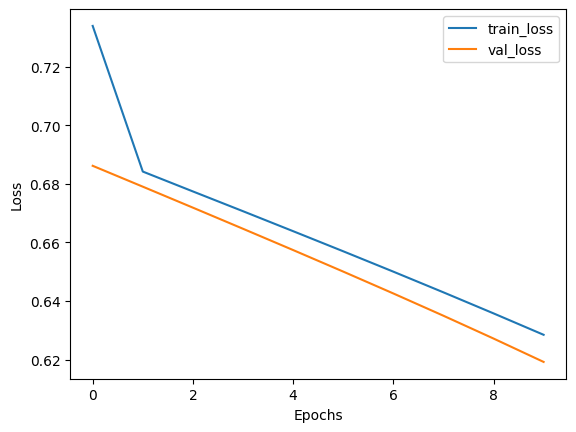

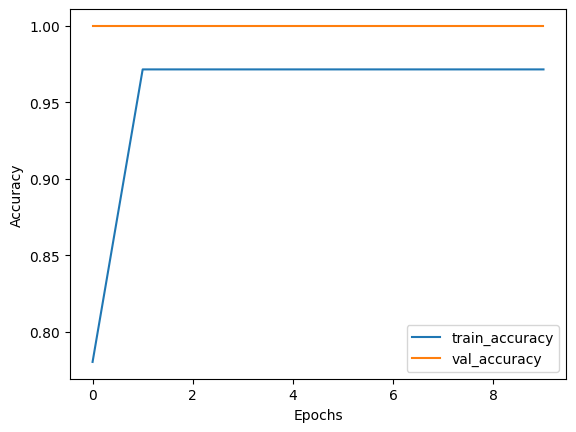

In [ ]:
# Plot training history 
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()